In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\DHANUPRASAD\Desktop\AirPassengers1.csv.xls")

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data.dtypes

#Passengers    int64
dtype: object

In [13]:
dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')

In [14]:
data=pd.read_csv(r"C:\Users\DHANUPRASAD\Desktop\AirPassengers1.csv.xls",parse_dates=['Month'],index_col='Month',date_parser=dateparse)

C:\Users\DHANUPRASAD\AppData\Local\Temp\ipykernel_11100\4031705943.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')


In [15]:
print("\n Parsed Data:")
print(data.head())


 Parsed Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [16]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [17]:
ts=data["#Passengers"]
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [18]:
type(ts)

pandas.core.series.Series

In [11]:
ts['1949-01-01']

from datetime import datetime

ts[datetime(1949,1,1)]

112

In [19]:
ts['1949-01-01':'1949-05-01']
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

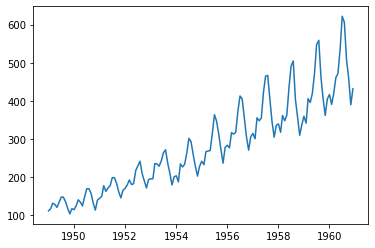

In [22]:
plt.plot(ts)

In [31]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    orig=plt.plot(timeseries,color='blue',label='Orginal')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    plt.legend(loc='best')
    plt.title('rolling mean & standard deviation')
    plt.show()
    print('results of dickey-fuller test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['test statistic','p-value','#lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key]=value
    print(dfoutput)

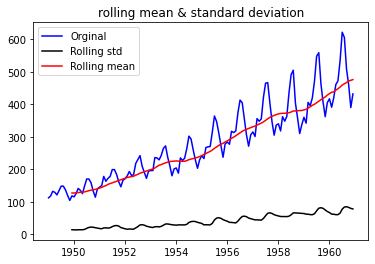

results of dickey-fuller test:
test statistic              0.815369
p-value                     0.991880
#lags used                 13.000000
number of observations    130.000000
critical value (1%)        -3.481682
critical value (5%)        -2.884042
critical value (10%)       -2.578770
dtype: float64


In [32]:
test_stationarity(ts)

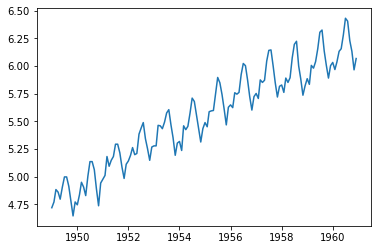

In [33]:
ts_log=np.log(ts)
plt.plot(ts_log)

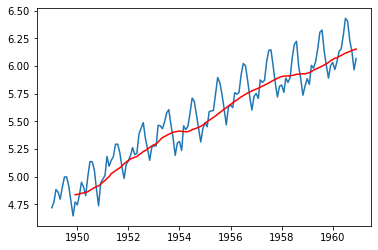

In [34]:
moving_avg=ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [35]:
ts_log_moving_avg_diff=ts_log-moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [36]:
type(ts_log)

pandas.core.series.Series

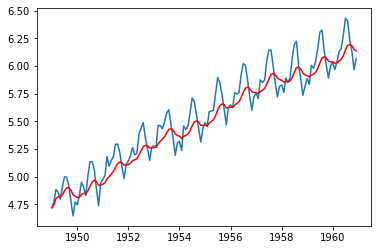

In [38]:
expwighted_avg=ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')


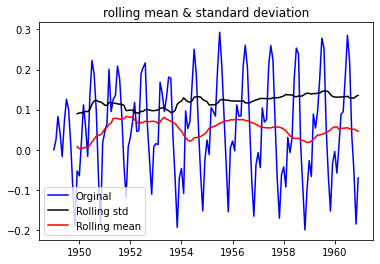

results of dickey-fuller test:
test statistic             -3.310542
p-value                     0.014414
#lags used                 13.000000
number of observations    130.000000
critical value (1%)        -3.481682
critical value (5%)        -2.884042
critical value (10%)       -2.578770
dtype: float64


In [39]:
ts_log_ewma_diff=ts_log-expwighted_avg
test_stationarity(ts_log_ewma_diff)

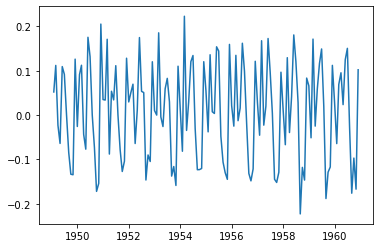

In [45]:
ts_log_diff=ts_log - ts_log.shift()
plt.plot(ts_log_diff)

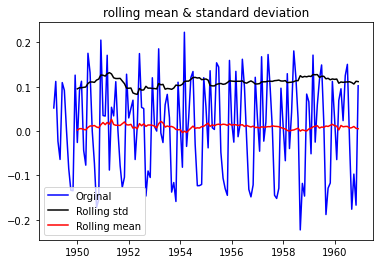

results of dickey-fuller test:
test statistic             -2.717131
p-value                     0.071121
#lags used                 14.000000
number of observations    128.000000
critical value (1%)        -3.482501
critical value (5%)        -2.884398
critical value (10%)       -2.578960
dtype: float64


In [43]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

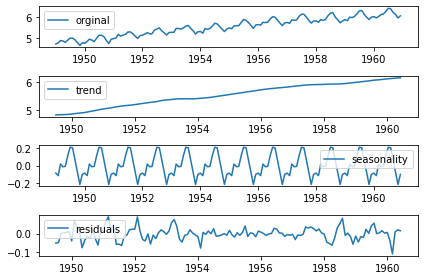

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(ts_log,label='orginal')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

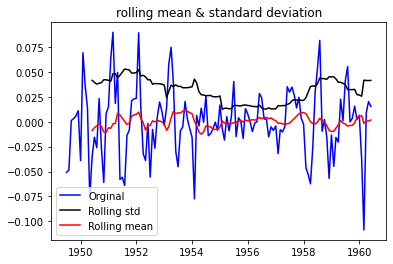

results of dickey-fuller test:
test statistic           -6.332387e+00
p-value                   2.885059e-08
#lags used                9.000000e+00
number of observations    1.220000e+02
critical value (1%)      -3.485122e+00
critical value (5%)      -2.885538e+00
critical value (10%)     -2.579569e+00
dtype: float64


In [48]:
ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)